In [9]:
# Importando os módulos
import pandas as pd      
import matplotlib as mat
import matplotlib.pyplot as plt    
import numpy as np                
%matplotlib inline

In [10]:
# Carregando o dataset
df = pd.read_csv("pima-data.csv")

In [11]:
#Verificando o formato dos dados
df.shape

(768, 10)

In [12]:
#Verificando as primeiras linhas do Dataset
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [13]:
#Verificando as últimas linhas do Datset
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [14]:
#Verificar se existe valores nulos
df.isnull().values.any()

False

In [15]:
#Criando um função que identifica a correlação entre as variáveis
#Correlação não implica causalidade
def plot_corr(df, size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

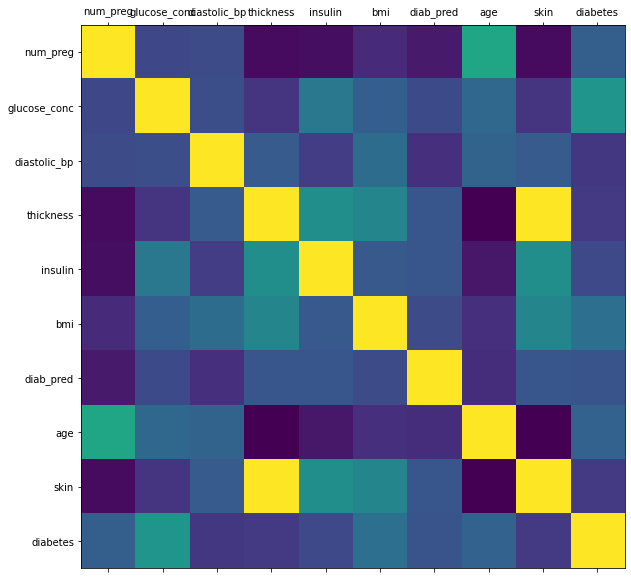

In [16]:
#Criando o gráfico
plot_corr(df)

In [17]:
#Visuzalização das correlações
# +1 = forte correlação positiva
# 0 = não há correlação
# -1 = forte correlação negativa
#Podemos visuzalizar isso em tabela
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081673,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057326,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436785,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392574,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183927,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113973,0.238356
skin,-0.081673,0.057326,0.207371,1.000000,0.436785,0.392574,0.183927,-0.113973,1.000000,0.074750
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074750,1.000000


In [18]:
#Definindo as classes
diabetes_map = {True:1, False:0}

In [19]:
#Aplicando o mapeamento ao dataset
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [20]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [21]:
#Verificando como os dados estão distribuídos
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print("Número de Casos Verdadeiros: {0} ({1:2.2f}%)".format(num_true, (num_true/(num_true + num_false))*100))
print("Número de Casos Falsos: {0} ({1:2.2f}%)".format(num_false, (num_false/(num_true+num_false))*100))

Número de Casos Verdadeiros: 268 (34.90%)
Número de Casos Falsos: 500 (65.10%)


In [22]:
import sklearn as sk
from sklearn.model_selection import train_test_split

In [23]:
# Seleção de variáveis preditoras (Feature Selection)
atributos = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']

In [24]:
# Variável a ser prevista
atrib_prev = ['diabetes']

In [25]:
# Criando objetos, colocando os valores nas variaveis X e Y
X = df[atributos].values
Y = df[atrib_prev].values

In [26]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [27]:
Y

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [28]:
# Criando dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

In [29]:
#Definindo a taxa de split
split_test_size = 0.30

In [30]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(X_treino)/len(df.index))*100))
print("{0:0.2f}% nos dados de teste".format((len(X_teste)/len(df.index))*100))

69.92% nos dados de treino
30.08% nos dados de teste


In [31]:
X_treino

array([[  1.   ,  95.   ,  60.   , ...,  23.9  ,   0.26 ,  22.   ],
       [  5.   , 105.   ,  72.   , ...,  36.9  ,   0.159,  28.   ],
       [  0.   , 135.   ,  68.   , ...,  42.3  ,   0.365,  24.   ],
       ...,
       [ 10.   , 101.   ,  86.   , ...,  45.6  ,   1.136,  38.   ],
       [  0.   , 141.   ,   0.   , ...,  42.4  ,   0.205,  29.   ],
       [  0.   , 125.   ,  96.   , ...,  22.5  ,   0.262,  21.   ]])

In [32]:
#Verificar se existem valores nulos
df.isnull().values.any()

False

In [33]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [34]:
#Verificar quandos valores 0 tem no Dataset, por coluna
print("# Linhas no DataFrame {0}".format(len(df)))
print("# Linhas Missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# Linhas Missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# Linhas Missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# Linhas Missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# Linhas Missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# Linhas Missing age: {0}".format(len(df.loc[df['age'] == 0])))

# Linhas no DataFrame 768
# Linhas Missing glucose_conc: 5
# Linhas Missing diastolic_bp: 35
# Linhas Missing thickness: 227
# Linhas Missing insulin: 374
# Linhas Missing bmi: 11
# Linhas Missing age: 0


In [35]:
from sklearn.impute import SimpleImputer

In [36]:
# Criando objeto
preenche_0 = SimpleImputer(missing_values = 0, strategy = "mean")

# Substituindo os valores iguais a zero, pela média dos dados
X_treino = preenche_0.fit_transform(X_treino)
X_teste = preenche_0.fit_transform(X_teste)

In [37]:
X_treino

array([[  1.        ,  95.        ,  60.        , ...,  23.9       ,
          0.26      ,  22.        ],
       [  5.        , 105.        ,  72.        , ...,  36.9       ,
          0.159     ,  28.        ],
       [  4.34056399, 135.        ,  68.        , ...,  42.3       ,
          0.365     ,  24.        ],
       ...,
       [ 10.        , 101.        ,  86.        , ...,  45.6       ,
          1.136     ,  38.        ],
       [  4.34056399, 141.        ,  72.24131274, ...,  42.4       ,
          0.205     ,  29.        ],
       [  4.34056399, 125.        ,  96.        , ...,  22.5       ,
          0.262     ,  21.        ]])

## Construindo o modelo de Machine Learning

In [38]:
# Utilizando um clasiificador Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [39]:
# Criando Modelo Preditivo
modelo_vl = GaussianNB()

In [40]:
modelo_vl.fit(X_treino, Y_treino.ravel())

GaussianNB()

# Verificando a exatidão no Modelo nos dados de Treino

In [41]:
from sklearn import metrics
nb_predict_train = modelo_vl.predict(X_treino)

In [42]:
print("Exatidão de Acuracia: {0:.4f}".format(metrics.accuracy_score(Y_treino, nb_predict_train)))
print()

Exatidão de Acuracia: 0.7542



## Verificando a exatidão no Modelo nos dados de Teste

In [43]:
nb_predict_test = modelo_vl.predict(X_teste)

In [44]:
print("Exatidão de Acuracia: {0:.4f}".format(metrics.accuracy_score(Y_teste,nb_predict_test)))
print()

Exatidão de Acuracia: 0.7359



In [45]:
# Criando uma Matriz de Confusão (Confusion Matrix)
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, nb_predict_test, labels=[1,0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, nb_predict_test, labels=[1,0]))

Confusion Matrix
[[ 52  28]
 [ 33 118]]

Classification Report
              precision    recall  f1-score   support

           1       0.61      0.65      0.63        80
           0       0.81      0.78      0.79       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



## Verificando Acuracia com o modelo de Regressão Logística

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
modelo_v2 = LogisticRegression(C = 0.7, random_state=42, max_iter=1000)
modelo_v2.fit(X_treino, Y_treino.ravel())
lr_predict_test = modelo_v2.predict(X_teste)

In [48]:
print("Exatidão Acuracia: {0:.4f}".format(metrics.accuracy_score(Y_teste, lr_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(Y_teste, lr_predict_test, labels=[1,0]))

Exatidão Acuracia: 0.7359

Classification Report
              precision    recall  f1-score   support

           1       0.63      0.59      0.61        80
           0       0.79      0.81      0.80       151

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



In [49]:
# Modelo Treinado, agora salvo e podemos usar mais tarde

In [50]:
import pickle

In [51]:
filename = 'Modelo_Treinado_v2.sav'
pickle.dump(modelo_v2, open(filename, 'wb'))

In [52]:
X_teste

array([[6.00000000e+00, 9.80000000e+01, 5.80000000e+01, ...,
        3.40000000e+01, 4.30000000e-01, 4.30000000e+01],
       [2.00000000e+00, 1.12000000e+02, 7.50000000e+01, ...,
        3.57000000e+01, 1.48000000e-01, 2.10000000e+01],
       [2.00000000e+00, 1.08000000e+02, 6.40000000e+01, ...,
        3.08000000e+01, 1.58000000e-01, 2.10000000e+01],
       ...,
       [4.85714286e+00, 1.27000000e+02, 8.00000000e+01, ...,
        3.63000000e+01, 8.04000000e-01, 2.30000000e+01],
       [6.00000000e+00, 1.05000000e+02, 7.00000000e+01, ...,
        3.08000000e+01, 1.22000000e-01, 3.70000000e+01],
       [5.00000000e+00, 7.70000000e+01, 8.20000000e+01, ...,
        3.58000000e+01, 1.56000000e-01, 3.50000000e+01]])

In [54]:
# Carregando o modelo e fazendo previsão com novo conjuntos de dados
# X_teste e Y_teste devem ser novos conjtos de dados, preparados com o procedimento de limpeza e transformação adequado

loaded_model = pickle.load(open(filename, 'rb'))
resultado1 = loaded_model.predict(X_teste[14].reshape(1, -1))
resultado2 = loaded_model.predict(X_teste[19].reshape(1, -1))

print("Primeiro Teste:")
if resultado1 == 1:
    print(resultado1,"=> Essa pessoa desenvolveu diabete")
elif resultado1 == 0:
    print(resultado1, "=> Essa pessoa não desenvolveu diabete")

print()
print("Segundo Teste:")
if resultado2 == 1:
    print(resultado2,"=> Essa pessoa desenvolveu diabete")
elif resultado2 == 0:
    print(resultado2,"=> Essa pessoa não desenvolveu diabete")

Primeiro Teste:
[0] => Essa pessoa não desenvolveu diabete

Segundo Teste:
[1] => Essa pessoa desenvolveu diabete
